# Sigmoid Neuron

The building block of the deep neural networks is called the sigmoid neuron. Sigmoid neurons are similar to perceptrons, but they are slightly modified such that the output from the sigmoid neuron is much smoother than the step functional output from perceptron.

$\Large \hat{y} = \frac{1}{1 + e ^ {(-wx+b)}}$

![](../assets/sigmoid_neuron_plot.png)

![](../assets/sigmoid_neuron_plot_3d.png)

## Import Library

In [332]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import trange
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, mean_squared_error

np.random.seed(0)
RATING_THRESHOLD = 4.2

## Load Data

In [333]:
dataframe = pd.read_csv('../data/MobileRating.csv')
dataframe.head()

,PhoneId,Pixel Density,Screen Size,Weight,RAM,Processor_frequency,Screen to Body Ratio (calculated),Height,Internal Memory,Capacity,...,os_name_Tizen,os_name_iOS,"SIM Slot(s)_Dual SIM, GSM+CDMA","SIM Slot(s)_Dual SIM, GSM+GSM","SIM Slot(s)_Dual SIM, GSM+GSM, Dual VoLTE","SIM Slot(s)_Single SIM, GSM",Sim1_2G,Sim1_3G,Sim1_4G,Rating
0,0,403,6.26,182,4,1.8,80.68,157.9,64,4000,...,0,0,0,0,1,0,0,0,1,4.5
1,1,271,6.20,168,3,1.8,80.85,156.2,32,4230,...,0,0,0,0,1,0,0,0,1,4.5
2,2,409,6.30,168,3,2.1,83.68,157.0,32,3500,...,0,0,0,0,1,0,0,0,1,4.4
3,4,411,6.00,169,4,2.2,74.78,159.8,64,3300,...,0,0,0,1,0,0,0,0,1,4.3
4,5,396,6.50,175,4,2.2,84.23,160.4,64,3750,...,0,0,0,0,1,0,0,0,1,4.4


## Visualize Data

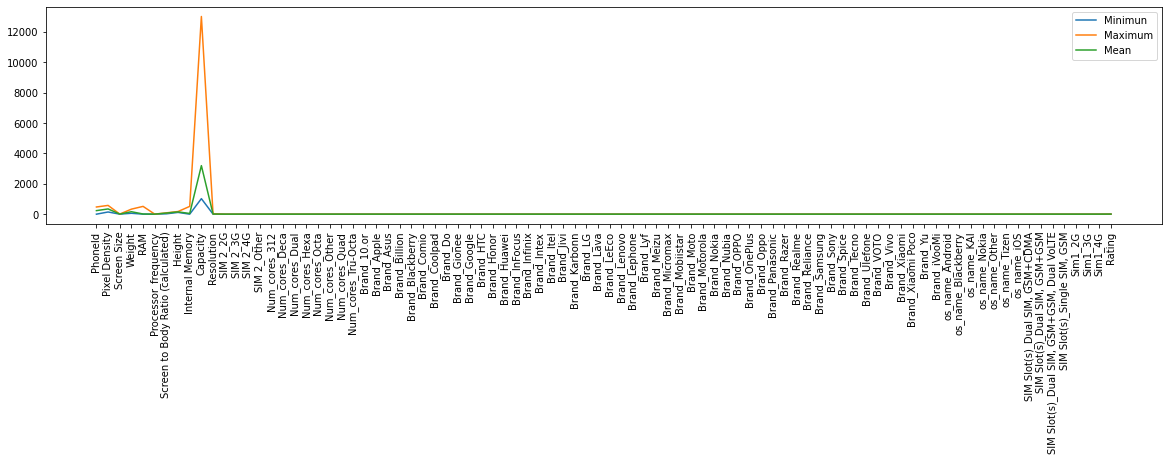

In [334]:
plt.figure(figsize=(20, 4))
plt.plot(dataframe.describe().loc['min'].T, label='Minimun'),
plt.plot(dataframe.describe().loc['max'].T, label='Maximum'),
plt.plot(dataframe.describe().loc['mean'].T, label='Mean')
plt.xticks(rotation='vertical')
plt.legend()
plt.show()

## Data Pre-processing

In [335]:
print(dataframe.shape)

(341, 88)


In [336]:
X = dataframe.drop(columns=['PhoneId', 'Rating'])
Y = dataframe['Rating']
Y_stratify = (dataframe['Rating'] >= RATING_THRESHOLD).astype(int)

print(X.shape, Y.shape)

(341, 86) (341,)


## Train-Test Split

In [337]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=10, stratify=Y_stratify)
print(X_train.shape, Y_train.shape, X_test.shape, Y_test.shape)

(272, 86) (272,) (69, 86) (69,)


## Convert to NumPy array

In [338]:
X_train = X_train.values
Y_train = Y_train.values.reshape((-1, 1))
X_test = X_test.values
Y_test = Y_test.values.reshape((-1, 1))

## Standardisation and Normalisation

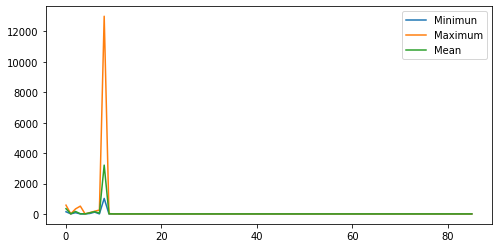

In [339]:
plt.figure(figsize=(8, 4))
plt.plot(X_train.min(axis=0), label='Minimun')
plt.plot(X_train.max(axis=0), label='Maximum')
plt.plot(X_train.mean(axis=0), label='Mean')
plt.legend()
plt.show()

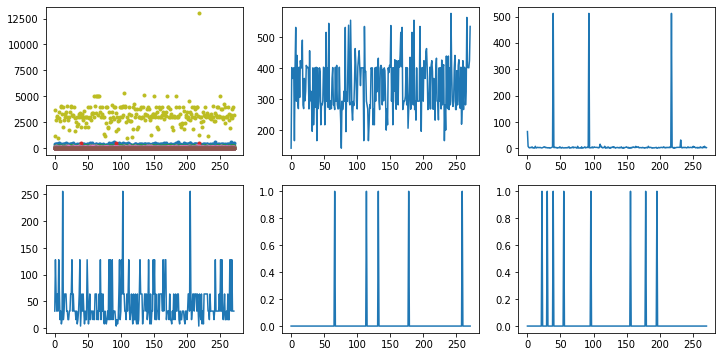

In [340]:
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(2, 3, figsize=(12, 6))
ax1.plot(X_train, '.')
ax2.plot(X_train[:,0])
ax3.plot(X_train[:,3])
ax4.plot(X_train[:,7])
ax5.plot(X_train[:,11])
ax6.plot(X_train[:,16])
plt.show()

In [341]:
standard_scaler = StandardScaler()
X_train = standard_scaler.fit_transform(X_train)
X_test = standard_scaler.transform(X_test)

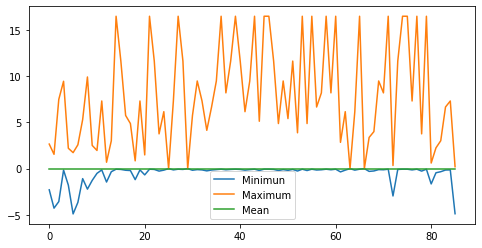

In [342]:
plt.figure(figsize=(8, 4))
plt.plot(X_train.min(axis=0), label='Minimun')
plt.plot(X_train.max(axis=0), label='Maximum')
plt.plot(X_train.mean(axis=0), label='Mean')
plt.legend()
plt.show()

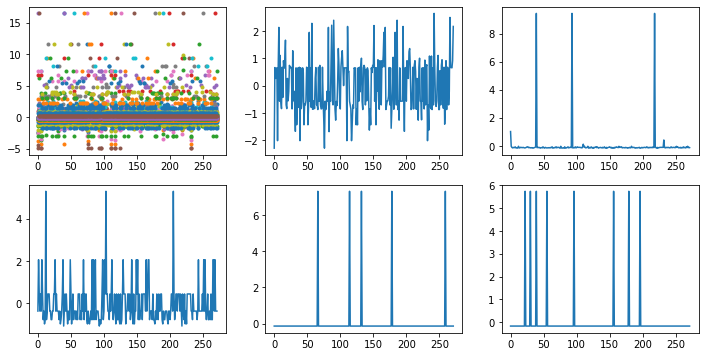

In [343]:
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(2, 3, figsize=(12, 6))
ax1.plot(X_train, '.')
ax2.plot(X_train[:,0])
ax3.plot(X_train[:,3])
ax4.plot(X_train[:,7])
ax5.plot(X_train[:,11])
ax6.plot(X_train[:,16])
plt.show()

In [344]:
minmax_scaler = MinMaxScaler()
Y_train = minmax_scaler.fit_transform(Y_train)
Y_test = minmax_scaler.transform(Y_test)

In [345]:
SCALED_RATING_THRESHOLD = minmax_scaler.transform([[RATING_THRESHOLD]]).item()

In [346]:
Y_train_binarised = (Y_train >= SCALED_RATING_THRESHOLD).astype(int)
Y_test_binarised = (Y_test >= SCALED_RATING_THRESHOLD).astype(int)

In [347]:
print(Y_train_binarised.mean(), Y_test_binarised.mean())

0.46691176470588236 0.463768115942029


## Sigmoid Neuron Class

In [348]:
class SigmoidNeuron:
    def __init__(self):
        self.w = None
        self.b = None
        self.train_loss = []
        self.test_loss = []
        self.train_accuracy = []

    def model(self, x):
        return 1. / (1. + np.exp(-(np.dot(self.w, x) + self.b)))

    def predict(self, X):
        return self.model(X)

    def loss(self, Y_hat, Y):
        return mean_squared_error(Y_hat, Y)

    def accuracy(self, Y_hat, Y_binarised):
        Y_hat_binarised = (Y_hat >= SCALED_RATING_THRESHOLD).astype(int)
        return accuracy_score(Y_hat_binarised.reshape(-1, 1), Y_binarised.reshape(-1, 1))

    def grad_w(self, X, Y, Y_hat):
        return ((1 - Y_hat) * (Y_hat - Y) * Y_hat * X).sum(axis=1).reshape(1, -1)

    def grad_b(self, Y, Y_hat):
        return ((1 - Y_hat) * (Y_hat - Y) * Y_hat).sum().reshape(1, 1)

    def fit(self, X, Y, X_test=None, Y_test=None, Y_train_binarised=None, epochs=1, learning_rate=1, initialze=True):
        X = X.T # (m, n) -> (n, m)
        Y = Y.reshape(1, -1) # (m, ) -> (1, m)
        X_test = X_test.T # (m, n) -> (n, m)
        Y_test = Y_test.reshape(1, -1) # (m, ) -> (1, m)
        Y_train_binarised = Y_train_binarised.reshape(1, -1) # (m, ) -> (1, m)

        if initialze:
            self.w = np.random.randn(1, X.shape[0])
            self.b = np.zeros((1, 1))

        for _ in trange(epochs, unit="epoch", desc="Epoch", ncols=80):
            # Forward Pass
            Y_hat = self.predict(X) # (1, m)
            loss = self.loss(Y_hat, Y)
            self.train_loss.append(loss)
            accuracy = self.accuracy(Y_hat, Y_train_binarised)
            self.train_accuracy.append(accuracy)
            
            # Backward Pass
            self.w -= learning_rate * self.grad_w(X, Y, Y_hat)
            self.b -= learning_rate * self.grad_b(Y, Y_hat)

            # Calculating Test Loss
            Y_test_hat = self.predict(X_test)
            test_loss = self.loss(Y_test_hat, Y_test)
            self.test_loss.append(test_loss)

            
    def plot_graphs(self):
        print('Final Train Loss:', self.train_loss[-1])
        print('Final Test Loss:', self.test_loss[-1])
        print('Final Train Accuracy:', self.train_accuracy[-1])

        plt.plot(self.train_loss, label='Train Loss')
        plt.plot(self.test_loss, label='Test Loss')
        plt.xlabel('Epochs')
        plt.ylabel('Mean Squared Error')
        plt.legend()
        plt.show()

        plt.plot(self.train_accuracy, label='Train Accuracy')
        plt.xlabel('Epochs')
        plt.ylabel('Accuracy')
        plt.legend()
        plt.show()

    def evaluate(self, X_test, Y_test_binarised):
        X_test = X_test.T # (m, n) -> (n, m)
        Y_test_binarised = Y_test_binarised.reshape(1, -1) # (m, ) -> (1, m)
        
        Y_test_hat = self.predict(X_test)
        test_accuracy = self.accuracy(Y_test_hat, Y_test_binarised)
        print('Test Accuracy:', test_accuracy)


## Train Model

Epoch: 100%|████████████████████████████| 2000/2000 [00:02<00:00, 974.19epoch/s]


Final Train Loss: 0.04301140209583014
Final Test Loss: 0.07658124487356718
Final Train Accuracy: 0.8014705882352942


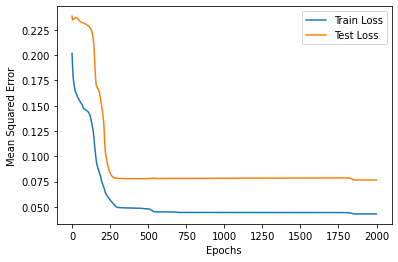

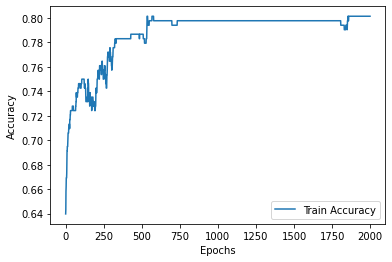

In [349]:
model = SigmoidNeuron()
model.fit(X_train, Y_train, X_test, Y_test, Y_train_binarised, epochs=2000, learning_rate=0.019)
model.plot_graphs()

## Model Evaluation

In [350]:
model.evaluate(X_test, Y_test_binarised)

Test Accuracy: 0.6666666666666666
